In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import pickle

In [2]:
def compute_fit_values(xvals, parameter_list):
    A, f, x0, phi, sigma = parameter_list
    
    cos_vals = np.cos(2. * np.pi * f * (xvals-x0) + phi)
    coef = A * np.exp(-1. * np.power(xvals-x0, 2) / (2. * np.power(sigma, 2)))
    return np.multiply(coef, cos_vals)

def plot_fits(fits):
    right_params = fits[0]["filter_0"]["right"]["params"]
    right_xvals = fits[0]["filter_0"]["right"]["xvals"]
    right_target = fits[0]["filter_0"]["right"]["target"]
    right_fit = compute_fit_values(right_xvals, right_params)

    left_params = fits[0]["filter_0"]["left"]["params"]
    left_xvals = fits[0]["filter_0"]["left"]["xvals"]
    left_target = fits[0]["filter_0"]["left"]["target"]
    left_fit = compute_fit_values(left_xvals, left_params)
    
    print("Parameter ordering: A, f, x0, phi, sigma")
    print("Right parameters:", right_params)
    print("Left parameters:", left_params)
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
    ax1.plot(left_xvals, left_target, label="Target")
    ax1.plot(left_xvals, left_fit, label="Fit")
    ax1.set_title("Left Filter")
    ax1.legend()
    
    ax2.plot(right_xvals, right_target, label="Target")
    ax2.plot(right_xvals, right_fit, label="Fit")
    ax2.set_title("Right Filter")
    ax2.legend()

## Show Fits

Parameter ordering: A, f, x0, phi, sigma
Right parameters: [0.1640519, 0.98645633, -0.17368738, -2.6200283, 2.8403282]
Left parameters: [-0.03824303, 0.0013624306, 0.64232713, -0.15732242, 1.45753]


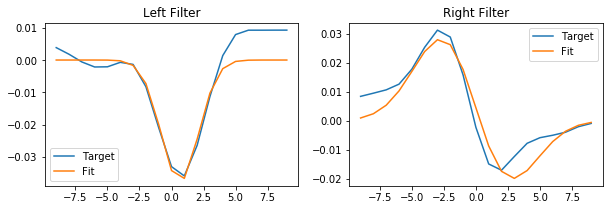

In [3]:
fits = pickle.load(open("../fits/fits.pkl", "rb"), encoding="latin1")
plot_fits(fits)